In [2]:
import counterfeit_utils as cfu
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

In [128]:
day_list = cfu.day_sales_from_db('nakamigos')['day'].unique()
intervals = cfu.compute_all_intervals('nakamigos',10,'objective_cf_num',remove_ders = True)
num_samples = 2
interval=10
tot_intervals = []
bandwidth=5
df = cfu.day_sales_from_db('nakamigos')
unique_values = np.array(sorted(df['day'].unique()))
ko_days = [pd.to_datetime(x[2]) for x in intervals[0]]
# print(ko_days)
# print(unique_values)
indices = []
for specific_datetime in ko_days:
    loc = np.where(unique_values == specific_datetime)[0]
    if loc:
        index = loc[0]
        indices.append(index)
# Creating and fitting the KDE

bw_scale = np.power(len(indices), -1/5)
print(bw_scale)
bw = bandwidth * bw_scale
kde = KernelDensity(bandwidth=bw,kernel='gaussian')
data = np.array(indices).reshape(-1, 1)
kde.fit(data)  # KDE expects data in 2D array format
# Sampling from the KDE
for x in range(0,num_samples):
    num_samples = 10
    samples = kde.sample(len(ko_days))
    round_samples = [round(x[0]) for x in samples]
    print(round_samples)
    intervals = []
    for x in round_samples:
        random_date = unique_values[x]
        intervals.append((random_date,cfu.compute_interval(interval,random_date,df)))
    tot_intervals.append(intervals)

0.4939741431709848
[15, 12, 7, 15, 96, 79, 15, 14, 50, 23, 9, 5, 25, 22, 18, 23, 192, 20, 19, 19, 187, 19, 29, 17, 100, 22, 11, 21, 14, 17, 9, 12, 8, 9, 19, 12, 14, 15, 21, 13, 16]
[12, 21, 189, 15, 17, 55, 6, 103, 9, 207, 11, 21, 37, 57, 192, 19, 11, 16, 207, 6, 14, 16, 17, 206, 7, 11, 205, 212, 15, 100, 15, 17, 19, 25, 27, 21, 12, 11, 206, 12, 204]


/tmp/ipykernel_1687566/218476536.py:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc:


In [21]:
ko_days = [pd.to_datetime(x[2]) for x in intervals[0]]

In [37]:
indices = []
for specific_datetime in ko_days:
    index = np.where(unique_values == specific_datetime)[0][0]
    if index==0:
        continue
    indices.append(index)

In [38]:
indices

[257, 236, 619, 251, 584, 542, 248, 358, 254, 399, 337, 242, 297, 557, 280]

In [3]:
import counterfeit_utils as cfu
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
top_slug = 'goblintownwtf'
tot_intervals = []
bandwidth = 5
intervals,_ = cfu.compute_all_intervals(top_slug,1,'objective_cf_num',remove_ders = True)
df = cfu.day_sales_from_db(top_slug)
unique_values = np.array(sorted(df['day'].unique()))
ko_days = [pd.to_datetime(x[2]) for x in intervals]
indices = []
print("Number of KO Days: ",len(ko_days))
print(ko_days)
print("Number of Unique Values: ",len(unique_values))
for specific_datetime in ko_days:
    loc = np.where(unique_values == specific_datetime)[0]
    if loc:
        index = loc[0]
        indices.append(index)
# Creating and fitting the KDE
print(indices)
if bandwidth:
    bw_scale = np.power(len(indices), -1/5)
    bw = bandwidth * bw_scale
    kde = KernelDensity(bandwidth=bw,kernel='gaussian')
    data = np.array(indices).reshape(-1, 1)
    kde.fit(data)  # KDE expects data in 2D array format
    # Sampling from the KDE

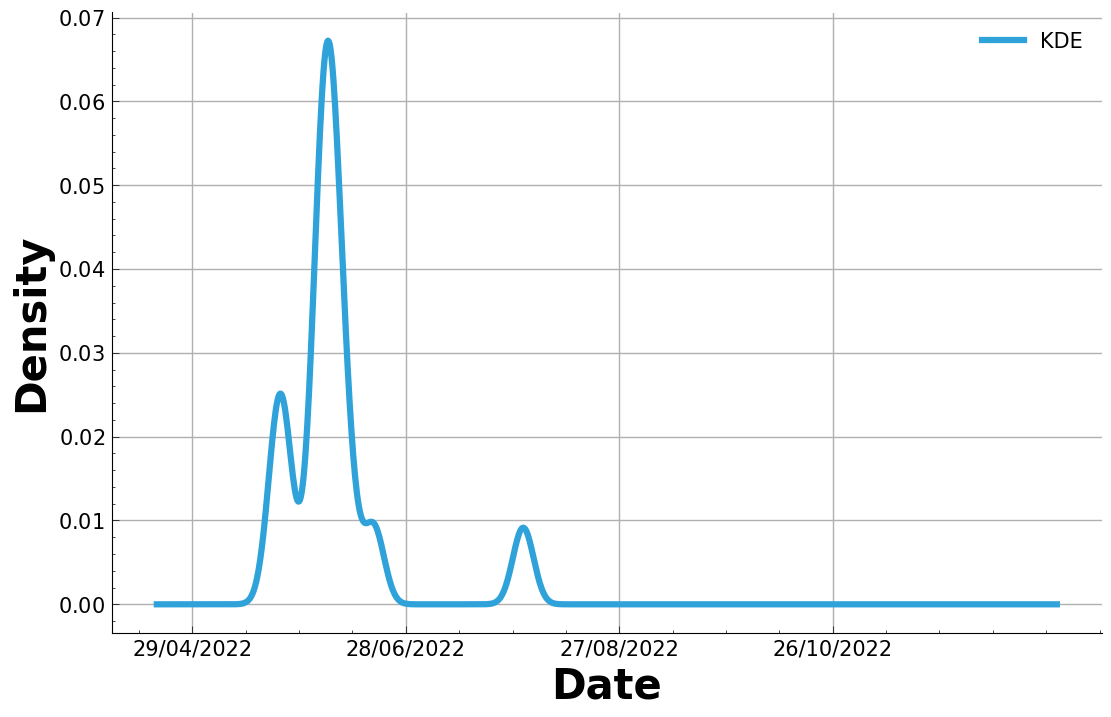

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('narunraman.mplstyle')

# Assuming you've already fit the KDE and have the model stored in 'kde'
# Generate data for plotting the KDE
x = np.linspace(-30, max(data+150), 1000).reshape(-1, 1)  # assuming 'data' is your data

# Calculate the log density values
log_density = kde.score_samples(x)
fig = plt.figure(figsize=(12, 8))
# Plot the KDE
plt.plot(x, np.exp(log_density), label='KDE')
x_map = {-20:"29/04/2022",0:"19/05/2022",20:"08/06/2022",40:"28/06/2022",60:"18/07/2022",80:"07/08/2022",100:"27/08/2022",160:"26/10/2022"}
plt.xlabel('Date')
plt.ylabel('Density')
locs = [-20,0,20,40,60,80]
locs = [-20,40,100,160]
dates = [x_map[x] for x in locs]
plt.xticks(locs,dates)
plt.legend()
plt.savefig("gtown_kde.jpg")
plt.show()

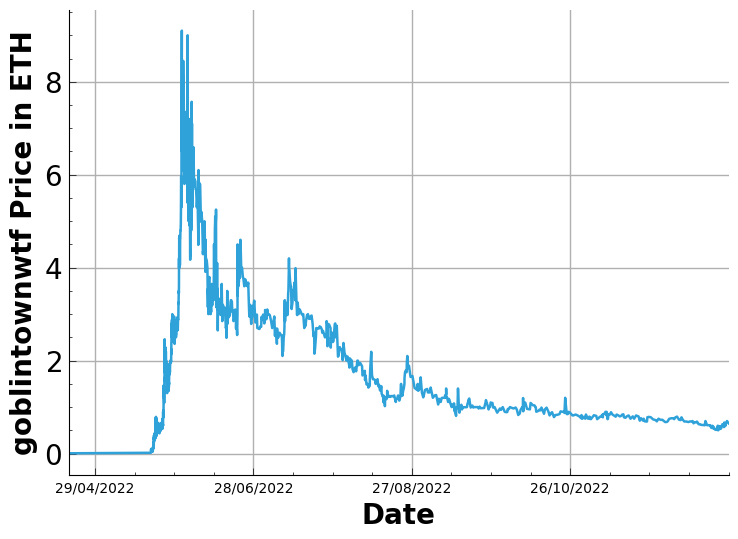

In [41]:
cfu.plot_price_chart_smooth("goblintownwtf")
locs = [15,75,135,195]
x_map = {15:"29/04/2022",35:"19/05/2022",55:"08/06/2022",75:"28/06/2022",95:"18/07/2022",115:"07/08/2022",135:"27/08/2022",195:"26/10/2022"}
dates = [x_map[x] for x in locs]
plt.xticks(locs,dates)
plt.xlim(5,255)
plt.xticks(fontsize=10)
plt.xlabel("Date")
plt.savefig("gtown_prices.jpg")
plt.show()

In [10]:
date_price = cfu.sales_from_db("goblintownwtf")
date_price = sorted(date_price)
print(date_price)

[(1649966434, 0.0047), (1649966561, 0.0045000000000000005), (1649966561, 0.0047), (1649966561, 0.0047), (1649966561, 0.0047), (1649966561, 0.0047), (1649966561, 0.005), (1649966561, 0.005), (1649966561, 0.005), (1649966561, 0.005), (1649967270, 0.0053), (1649967270, 0.0054), (1649967270, 0.0055000000000000005), (1649967270, 0.0057), (1649967270, 0.0057), (1649967576, 0.0044), (1649967576, 0.0044), (1649967576, 0.0044), (1649967576, 0.0044), (1649967576, 0.0044), (1649967780, 0.0039000000000000003), (1649968270, 0.0037), (1649968720, 0.0037), (1649969786, 0.003), (1653092695, 0.0369), (1653092851, 0.024), (1653092851, 0.025), (1653092882, 0.004), (1653093014, 0.006), (1653093056, 0.016900000000000002), (1653093056, 0.018000000000000002), (1653093056, 0.019000000000000003), (1653093056, 0.019600000000000003), (1653093056, 0.02), (1653093235, 0.012990000000000002), (1653093235, 0.015000000000000001), (1653093235, 0.015000000000000001), (1653093235, 0.0159), (1653093277, 0.0110000000000000

In [30]:
date = pd.Timestamp('2022-08-07')

# Add 100 days to the date
new_date = date + pd.Timedelta(days=80)

print(new_date)

2022-10-26 00:00:00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('narunraman.mplstyle')

# Assuming you've already fit the KDE and have the model stored in 'kde'
# Generate data for plotting the KDE
x = np.linspace(-30, max(data+150), 1000).reshape(-1, 1)  # assuming 'data' is your data

# Calculate the log density values
log_density = kde.score_samples(x)
fig = plt.figure(figsize=(12, 8))
# Plot the KDE
plt.plot(x, np.exp(log_density), label='KDE')
x_map = {-20:"29/04/2022",0:"19/05/2022",20:"08/06/2022",40:"28/06/2022",60:"18/07/2022",80:"07/08/2022",100:"27/08/2022",160:"26/10/2022"}
plt.xlabel('Date')
plt.ylabel('Density')
locs = [-20,0,20,40,60,80]
locs = [-20,40,100,160]
dates = [x_map[x] for x in locs]
plt.xticks(locs,dates)
plt.legend()
cfu.plot_price_chart_smooth("goblintownwtf")
locs = [15,75,135,195]
x_map = {15:"29/04/2022",35:"19/05/2022",55:"08/06/2022",75:"28/06/2022",95:"18/07/2022",115:"07/08/2022",135:"27/08/2022",195:"26/10/2022"}
dates = [x_map[x] for x in locs]
plt.xticks(locs,dates)
plt.xlim(5,255)
plt.xticks(fontsize=10)
plt.xlabel("Date")
# plt.savefig("gtown_kde.jpg")
plt.show()

NameError: name 'data' is not defined